In [1]:
housing <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
colnames(housing) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PRATIO",
                      "B", "LSTAT", "MDEV")
summary(housing)

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

In [2]:
housing <- housing[order(housing$MDEV),]
#install.packages("caret")
library(caret)
set.seed(5557)
indices <- createDataPartition(housing$MDEV, p=0.75, list=FALSE)
training <- housing[indices,]
testing <- housing[-indices,]
nrow(training)
nrow(testing)
testing$MDEV

Loading required package: lattice
Loading required package: ggplot2


[1] 381

[1] 125

[1]  5.6  7.2  8.1  8.5 10.5 10.8 11.0 11.3 11.5 11.8 11.8 11.9 12.0 12.3 12.7
 [16] 13.1 13.3 13.5 13.6 14.1 14.2 14.3 14.5 14.6 14.8 14.9 15.2 15.4 16.1 16.4
 [31] 16.7 17.4 17.8 17.9 18.2 18.4 18.4 18.5 18.5 18.7 18.8 18.9 18.9 19.1 19.4
 [46] 19.4 19.6 19.7 19.8 19.8 19.9 20.0 20.1 20.3 20.3 20.4 20.5 20.6 20.7 20.8
 [61] 20.8 20.9 21.0 21.6 21.6 21.7 21.7 21.8 21.9 22.0 22.0 22.0 22.2 22.6 22.7
 [76] 22.7 23.0 23.1 23.1 23.2 23.2 23.3 23.6 23.7 23.9 24.3 24.3 24.4 24.4 24.7
 [91] 24.8 25.0 25.0 25.0 26.5 27.0 27.1 27.5 28.0 28.4 28.7 29.0 29.1 29.6 29.8
[106] 30.1 31.2 31.5 32.0 32.2 32.4 32.7 33.1 35.1 35.4 36.2 36.2 37.3 37.6 41.7
[121] 42.8 46.0 46.7 50.0 50.0

In [3]:
library(class)
knnModel <- knn(train=training, test=testing, cl=training$MDEV)
knnModel

[1] 10.5 9.7  7    6.3  13.1 16.3 16.1 13.3 13.3 13.4 17.2 20.6 13.8 13.3 13.1
 [16] 15.6 16.2 13.4 20.1 13.3 21.9 17.8 13.6 13.4 13.9 17.2 20.1 17.1 17.1 14.9
 [31] 17.2 23   17.5 7.2  23.1 15.6 16.2 19.2 18.7 17.8 19.2 18.9 21.4 19.6 20.1
 [46] 23.8 15.6 20.5 19.5 19.3 20.6 24.4 21.4 21.4 23.1 19.9 17.6 18.2 33   17.8
 [61] 13   23.5 18.2 16.6 22.8 21.2 19.6 21.2 33.3 20.9 21.4 20.1 23.9 19.3 15.6
 [76] 19.5 21.4 29.4 23.6 22   19.1 22.4 23.9 23.7 24.6 24   22   22.4 35.2 33.3
 [91] 24.1 23.4 23.8 21   27.5 22.3 23.8 21.9 24.8 28.2 23   22.5 31.1 37.2 30.5
[106] 50   30.5 21.7 34.9 24.5 29.1 22.9 29.1 35.4 48.5 28.7 37.2 28.5 44.8 44.8
[121] 29.6 45.4 24.2 44.8 50  
199 Levels: 5 6.3 7 7.2 7.4 7.5 8.3 8.4 8.5 8.7 8.8 9.5 9.6 9.7 10.2 ... 50

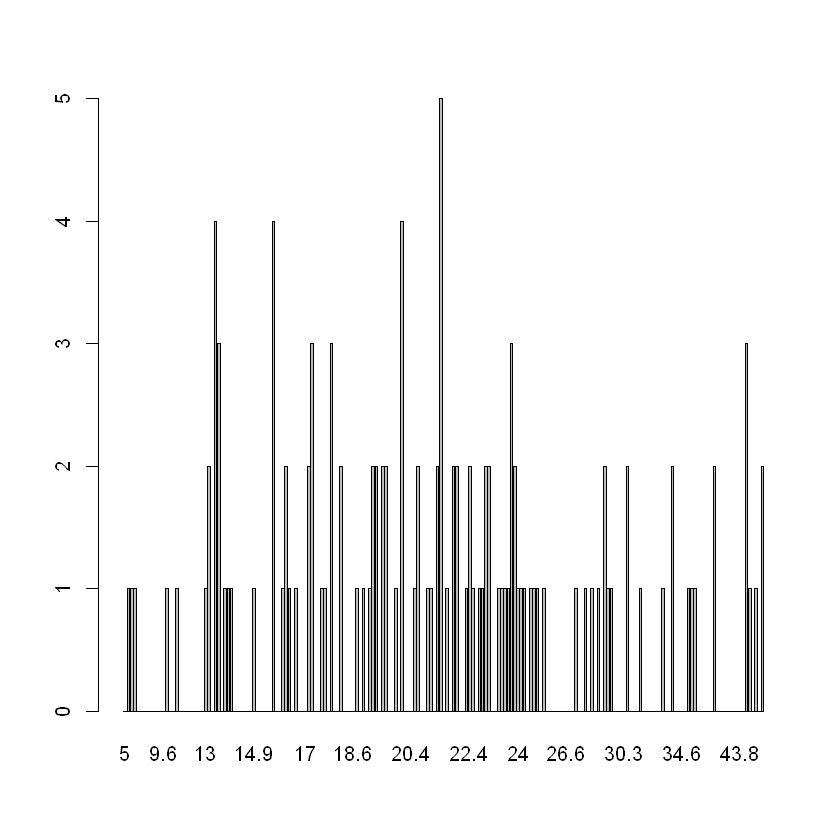

In [4]:
plot(knnModel)

In [6]:
predicted <- read.table("housing-knn-predicted.csv")
colnames(predicted) <- c("predicted")
predicted

predicted
10.5
9.7
7.0
6.3
13.1
16.3
16.1
13.3
13.3
13.4


In [7]:
results <- data.frame(testing$MDEV, predicted)
head(results)

testing.MDEV,predicted
5.6,10.5
7.2,9.7
8.1,7.0
8.5,6.3
10.5,13.1
10.8,16.3
